In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import scmdata
import seaborn as sns
import numpy as np
import pandas as pd

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
ID = "sb_noSRM_inclu"

<IPython.core.display.Javascript object>

In [5]:
INPUT_DIR = Path(utils.DATA_DIR / "interim" / "delta_rf")
INPUT_FILE_META = INPUT_DIR / f"{ID}_delta-erf_meta_TCRE.csv"

<IPython.core.display.Javascript object>

In [6]:
OUTPUT_FILE = (
    utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf_meta_TCRE_ratio.csv"
)

<IPython.core.display.Javascript object>

In [7]:
data = pd.read_csv(str(Path(INPUT_FILE_META)))

<IPython.core.display.Javascript object>

In [8]:
data = data[data["variable"] == "delta_rf"]

<IPython.core.display.Javascript object>

In [9]:
# data["TCRE_ratio"] = data["TCRE"] / data["TCRE_down"]
data["TCRE_ratio_up"] = data["TCRE_up"] / data["TCRE_down"]
data["TCRE_up_minus_down"] = data["TCRE_up"] - data["TCRE_down"]


<IPython.core.display.Javascript object>

In [10]:
data_sel = data[
    (data["year_return_back_below_15_temp"] < 9999)
    & (data["year_return_back_below_15_temp"] > 1111)
]

data_sel.loc[data_sel.TCRE_ratio_up > data_sel["TCRE_ratio_up"].quantile(0.99), "TCRE_ratio_up"] = np.nan
data_sel.loc[data_sel.TCRE_ratio_up < data_sel["TCRE_ratio_up"].quantile(0.01), "TCRE_ratio_up"] = np.nan


<IPython.core.display.Javascript object>

In [11]:
data_sel["Year of net-zero CO2"] = pd.cut(
    data_sel["net-zero_year"],
    [0, 2050, 2100, 2150, 2500],
    labels=["<2050", "2050-2100", "2100-2150", ">2150"],
    # labels=["<0.01", "0.01-0.02", "0.02-0.05", "0.05-0.2", "0.2-0.3", ">0.3"],
)
data_sel["Average annual NNEs"] = pd.cut(
    data_sel["average_cdr_between_net0_and_15"],
    [0, 1000, 5000, 15000, 25000, 45000],
    labels=["<1", "1-5", "5-15", "15-25", ">25"],
)
data_sel["Cum emissions peak-warming 1.5°C"] = pd.cut(
    data_sel["cumulative_emms_peak_warming_to_15"],
    [-1.5e7, -3e6, -7e5, -2e5, 0, 2e6],
    labels=["< -3e6", "-3e6 - -7e5", "-7e5 - -2e5", "-2e5 - 0", "> 0"],
)
data_sel["peak_warming_categories"] = pd.cut(
    data_sel["peak_warming"],
    [0, 1.7, 2, 2.5, 3.0, 30],
    labels=["<1.7°C", "1.7-2.0", "2.0-2.5 °C", "2.5-3.0 °C", ">3.0 °C"],
)

data_sel["TCRE_ratio_up_cat"] = pd.cut(
    data_sel["TCRE_ratio_up"],
    [-5, 0, 2, 4, 6, 10],
    labels=["< 0", "0 - 2", "2 - 4", "4 - 6", "> 6"],
)

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_64615/570600783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel["Year of net-zero CO2"] = pd.cut(
/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_64615/570600783.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel["Average annual NNEs"] = pd.cut(
/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_64615/570600783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

<IPython.core.display.Javascript object>

Text(0.5, 0, 'TCRE_up_minus_down')

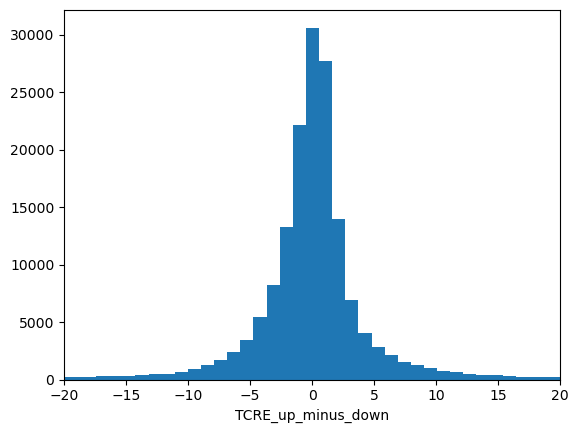

<IPython.core.display.Javascript object>

In [12]:
plt.hist(data_sel["TCRE_up_minus_down"], bins=100)
plt.xlim(-20, 20)
plt.xlabel("TCRE_up_minus_down")

Text(0.5, 0, 'TCRE_up / TCRE_down')

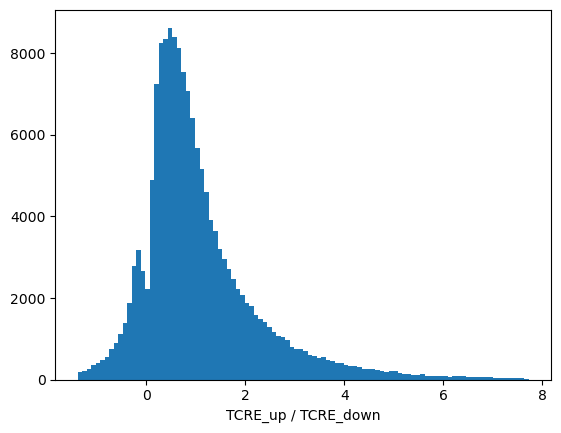

<IPython.core.display.Javascript object>

In [13]:
plt.hist(data_sel["TCRE_ratio_up"], bins=100)
# plt.xlim(-8, 3)
plt.xlabel("TCRE_up / TCRE_down")

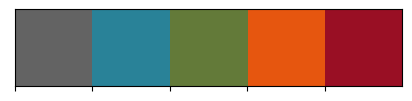

<IPython.core.display.Javascript object>

In [14]:
a1, b1, c1 = 99, 99, 99
a2, b2, c2 = 41, 130, 152
a3, b3, c3 = 99, 122, 57
a4, b4, c4 = 230, 86, 15
a5, b5, c5 = 153, 15, 36


palette = sns.color_palette(
    [
        (a1 / 255, b1 / 255, c1 / 255),
        (a2 / 255, b2 / 255, c2 / 255),
        (a3 / 255, b3 / 255, c3 / 255),
        (a4 / 255, b4 / 255, c4 / 255),
        (a5 / 255, b5 / 255, c5 / 255),
    ]
)

# Use palplot and pass in the variable:
sns.palplot(palette)

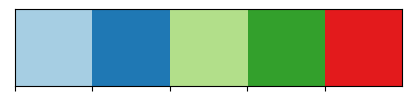

<IPython.core.display.Javascript object>

In [15]:
colors = [
    sns.color_palette("Paired")[0],
    sns.color_palette("Paired")[1],
    #  sns.color_palette("Paired")[11],
    sns.color_palette("Paired")[2],
    sns.color_palette("Paired")[3],
    sns.color_palette("Paired")[5],
    #   sns.color_palette("Paired")[9],
]
sns.palplot(colors)

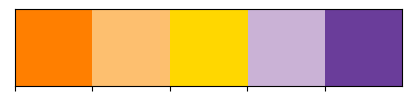

<IPython.core.display.Javascript object>

In [33]:
colors_TCRE = [
    # "saddlebrown",
    sns.color_palette("Paired")[7],
    sns.color_palette("Paired")[6],
    "gold",
    sns.color_palette("Paired")[8],
    sns.color_palette("Paired")[9],
    #   "brown",
]
sns.palplot(colors_TCRE)

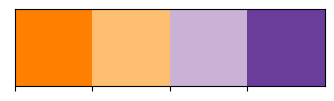

<IPython.core.display.Javascript object>

In [38]:
colors_netzero = [
    # "saddlebrown",
    sns.color_palette("Paired")[7],
    sns.color_palette("Paired")[6],
    #  "gold",
    sns.color_palette("Paired")[8],
    sns.color_palette("Paired")[9],
    #   "brown",
]
sns.palplot(colors_netzero)

In [17]:
data_sel["cumulative_emms_peak_warming_to_15"].describe()

count    1.662100e+05
mean    -1.238091e+06
std      1.578074e+06
min     -1.431310e+07
25%     -1.603146e+06
50%     -7.641654e+05
75%     -2.630212e+05
max      1.855471e+06
Name: cumulative_emms_peak_warming_to_15, dtype: float64

<IPython.core.display.Javascript object>

Text(0.5, 0, 'eTCRE-ratio')

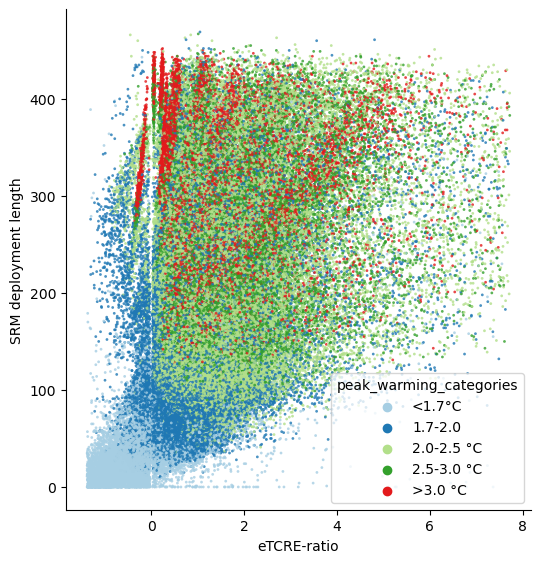

<IPython.core.display.Javascript object>

In [69]:
fig, ax = plt.subplots(figsize=(6, 6.5))

sns.scatterplot(
    x="TCRE_ratio_up",
    y="SRM_at_first_crossing",
    data=data_sel,
    hue="peak_warming_categories",
    ec=None,
    s=4,
    alpha=0.8,
    palette=colors
    #  palette=sns.color_palette("rocket", as_cmap=True),
    # palette=sns.color_palette("gray"),
    # palette=sns.cubehelix_palette(start=5, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True),
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# plt.xlim(-7.7, 1.4)
plt.ylabel("SRM deployment length")
# plt.xlabel("eTCRE-up / eTCRE-down")
plt.xlabel("eTCRE-ratio")

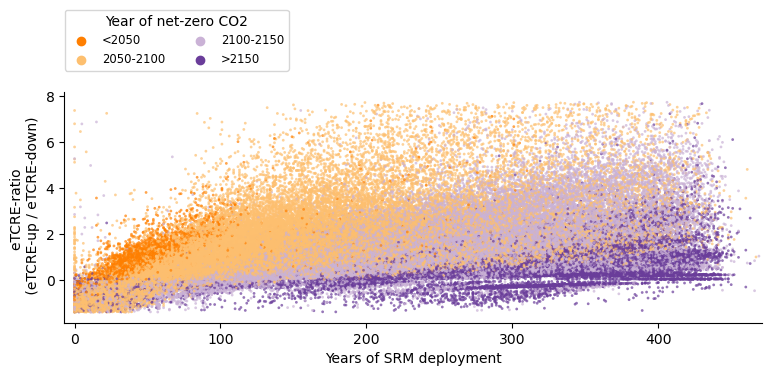

<IPython.core.display.Javascript object>

In [39]:
fig, ax = plt.subplots(figsize=(9, 3))

sns.scatterplot(
    x="SRM_at_first_crossing",
    y="TCRE_ratio_up",
    data=data_sel,
    hue="Year of net-zero CO2",
    ec=None,
    s=4,
    alpha=0.7,
    palette=colors_netzero,
    legend=True
    #  palette=sns.color_palette("rocket", as_cmap=True),
    # palette=sns.color_palette("gray"),
    # palette=sns.cubehelix_palette(start=5, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True),
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim(-7, 471)
# plt.ylim(-2.7, 12)
plt.legend(
    title="Year of net-zero CO2",
    fontsize="small",
    #  fancybox=True,
    bbox_to_anchor=(0.33, 1.38),
    ncol=2,
)
plt.xlabel("Years of SRM deployment")
# plt.xlabel("eTCRE-up / eTCRE-down")
plt.ylabel("eTCRE-ratio \n (eTCRE-up / eTCRE-down)")

plt.savefig(
    str(Path(utils.PLOTS_DIR / "SI" / f"{ID}_figure4c.png")), bbox_inches="tight"
)
plt.show()

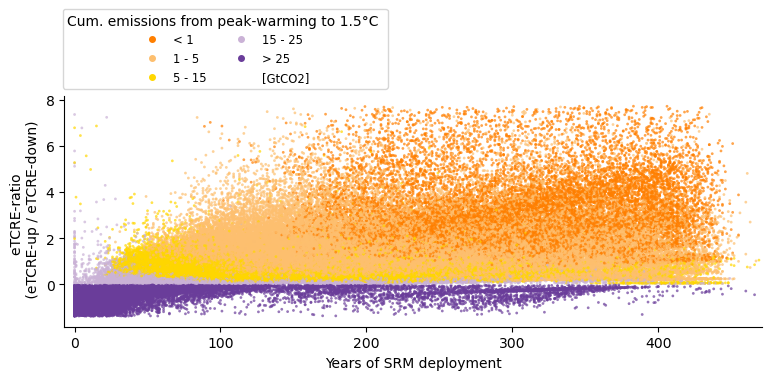

<IPython.core.display.Javascript object>

In [45]:
fig, ax = plt.subplots(figsize=(9, 3))

sns.scatterplot(
    x="SRM_at_first_crossing",
    y="TCRE_ratio_up",
    data=data_sel,
    hue="Cum emissions peak-warming 1.5°C",
    ec=None,
    s=4,
    alpha=0.7,
    palette=colors_TCRE,
    legend=True
    #  palette=sns.color_palette("rocket", as_cmap=True),
    # palette=sns.color_palette("gray"),
    # palette=sns.cubehelix_palette(start=5, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True),
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlim(-7, 471)
# plt.ylim(-2.7, 12)

import matplotlib.lines as mlines

smaller1 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[0],
    marker="o",
    linestyle="None",
    markersize=4,
    label="< 1",
)
CDR15 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[1],
    marker="o",
    linestyle="None",
    markersize=4,
    label="1 - 5",
)
CDR515 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[2],
    marker="o",
    linestyle="None",
    markersize=4,
    label="5 - 15",
)
CDR1525 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[3],
    marker="o",
    linestyle="None",
    markersize=4,
    label="15 - 25",
)
larger25 = mlines.Line2D(
    [],
    [],
    color=colors_TCRE[4],
    marker="o",
    linestyle="None",
    markersize=4,
    label="> 25",
)
unit = mlines.Line2D(
    [],
    [],
    color="white",
    marker="o",
    linestyle="None",
    markersize=4,
    label="[GtCO2]",
)

cur_pol = mlines.Line2D(
    [],
    [],
    color="black",
    marker="o",
    linestyle="None",
    markersize=4,
    label="current 2100 NDC-projections",
)


plt.legend(
    title="Cum. emissions from peak-warming to 1.5°C ",
    fontsize="small",
    bbox_to_anchor=(0.472, 1.4),
    ncol=2,
    handles=[smaller1, CDR15, CDR515, CDR1525, larger25, unit],
)


plt.xlabel("Years of SRM deployment")
# plt.xlabel("eTCRE-up / eTCRE-down")
plt.ylabel("eTCRE-ratio \n (eTCRE-up / eTCRE-down)")

plt.savefig(
    str(Path(utils.PLOTS_DIR / "figure2" / f"{ID}_part3.png")), bbox_inches="tight"
)
plt.show()

time above 1.5°C =(NZ date - 2030) [1-  (TCRE_up*(avg_emissions_before_net-zero)/(TCRE_down*(avg emissions after peak))]

In [82]:
data_sel["t_above_15"] = (data_sel["net-zero_year"] - 2030) - (
    (data_sel["net-zero_year"] - 2030)
    * (data_sel["TCRE_up"] * data_sel["average_annual_emissions_2030_net-zero"])
    / (data_sel["TCRE_down"] * (data_sel["average_cdr_between_net0_and_15"] * -1))
)

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_76844/3851932782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel["t_above_15"] = (data_sel["net-zero_year"] - 2030) - (


<IPython.core.display.Javascript object>

In [83]:
data_sel["t_above_15"].replace([np.inf, -np.inf], np.nan, inplace=True)

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_76844/1330753458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel["t_above_15"].replace([np.inf, -np.inf], np.nan, inplace=True)


<IPython.core.display.Javascript object>

In [84]:
data_sel.loc[data_sel.t_above_15 > data_sel["t_above_15"].quantile(0.99), "t_above_15"] = np.nan
data_sel.loc[data_sel.t_above_15 < data_sel["t_above_15"].quantile(0.01), "t_above_15"] = np.nan


<IPython.core.display.Javascript object>

In [85]:
data_sel["t_above_15"].describe()

count    157548.000000
mean       -755.323890
std        8731.541147
min     -176454.036959
25%          89.694291
50%         151.158058
75%         260.844473
max        1083.127251
Name: t_above_15, dtype: float64

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time above 15')

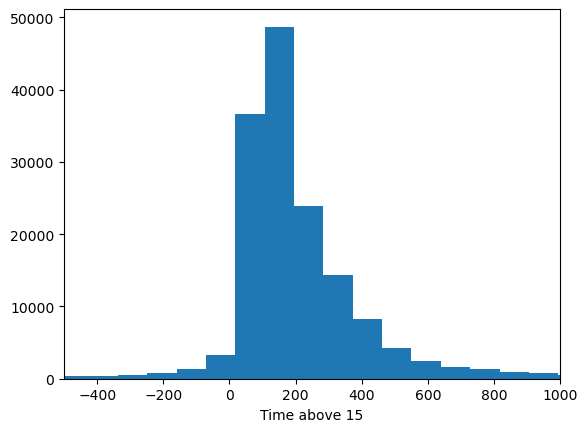

<IPython.core.display.Javascript object>

In [86]:
plt.hist(data_sel["t_above_15"], bins=2000)
plt.xlim(-500, 1000)
plt.xlabel("Time above 15")

(-1500.0, 1500.0)

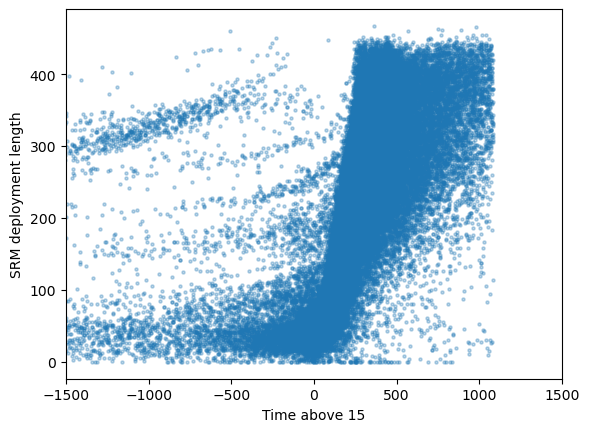

<IPython.core.display.Javascript object>

In [87]:
plt.scatter(data_sel["t_above_15"], data_sel["SRM_at_first_crossing"], s=5, alpha=0.3)
plt.xlabel("Time above 15")
plt.ylabel("SRM deployment length")
plt.xlim(-1500, 1500)

In [88]:
data_sel["ratios"] = (
    data_sel["TCRE_up"] * data_sel["average_annual_emissions_2030_net-zero"]
) / (data_sel["TCRE_down"] * (data_sel["average_cdr_between_net0_and_15"] * -1))


data_sel["ratios"].replace([np.inf, -np.inf], np.nan, inplace=True)
data_sel.loc[data_sel.ratios > data_sel["ratios"].quantile(0.99), "ratios"] = np.nan
data_sel.loc[data_sel.ratios < data_sel["ratios"].quantile(0.01), "ratios"] = np.nan

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_76844/2524523637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel["ratios"] = (
/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_76844/2524523637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sel["ratios"].replace([np.inf, -np.inf], np.nan, inplace=True)


<IPython.core.display.Javascript object>

Text(0.5, 0, 'TCRE_up * avg annual em 2030 - net0 / TCRE_down * avg annual em net0 - 1.5°C')

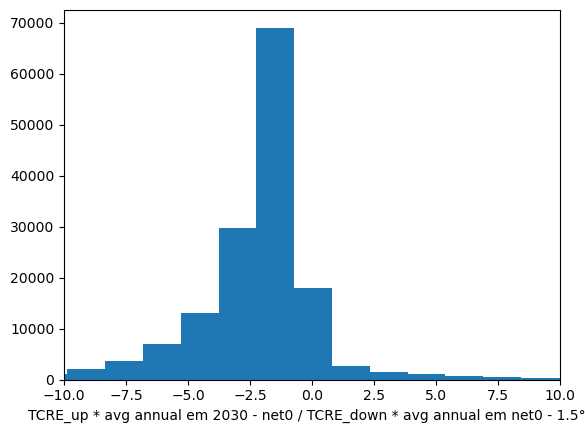

<IPython.core.display.Javascript object>

In [39]:
plt.hist(data_sel["ratios"], bins=2000)
plt.xlim(-10, 10)
plt.xlabel(
    "TCRE_up * avg annual em 2030 - net0 / TCRE_down * avg annual em net0 - 1.5°C"
)

(-15.0, 15.0)

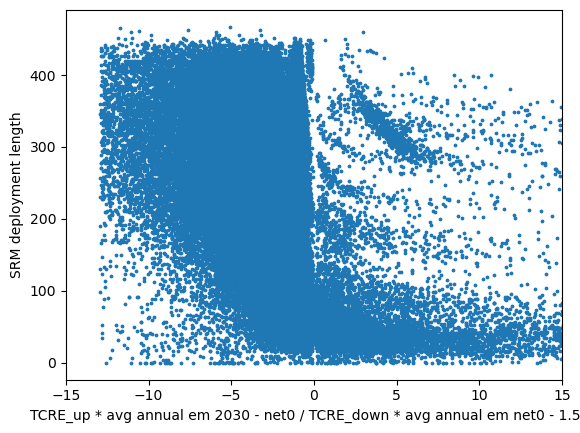

<IPython.core.display.Javascript object>

In [44]:
plt.scatter(data_sel["ratios"], data_sel["SRM_at_first_crossing"], s=3)
plt.xlabel(
    "TCRE_up * avg annual em 2030 - net0 / TCRE_down * avg annual em net0 - 1.5°C"
)
plt.ylabel("SRM deployment length")
plt.xlim(-15, 15)

Text(0, 0.5, 'SRM deployment length')

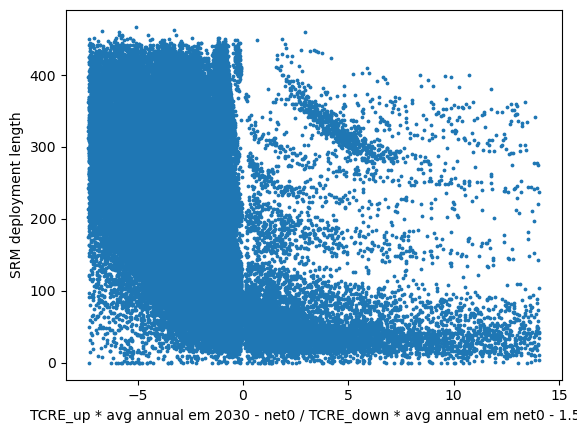

<IPython.core.display.Javascript object>

In [40]:
plt.scatter(data_sel["ratios"], data_sel["SRM_at_first_crossing"], s=3)
plt.xlabel(
    "TCRE_up * avg annual em 2030 - net0 / TCRE_down * avg annual em net0 - 1.5°C"
)
plt.ylabel("SRM deployment length")

In [89]:
data_sel.to_csv(str(OUTPUT_FILE))

<IPython.core.display.Javascript object>